### IMPORTS

In [2]:
import re   ##re:regularexpression
import pandas as pd 

#### Opening  the text file in read only mode

In [3]:
f=open("WhatsApp Chat with Secretariat IITBHU MUN 12th Edition.txt",'r',encoding='utf-8')

#### Storing the data 

In [4]:
data=f.read()

print(data)

#### Creating a new Dataframe out of the text file

In [5]:
pattern='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'   #it splits the text messages into date time and messages 

##### Splitting the whatsapp text into messages and dates

In [6]:
messages=re.split(pattern,data)[1:]

In [7]:
messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'Shreeyam created group "Junior Secretariat IITBHU MUN 12th Edition "\n',
 'Shreeyam added you\n',
 "You're now an admin\n",
 "Shreeyam changed this group's icon\n",
 'Shreeyam changed the group name from "Junior Secretariat IITBHU MUN 12th Edition " to "Secretariat IITBHU MUN 12th Edition"\n',
 "+91 93010 56446 joined using this group's invite link\n",
 "+91 92635 99837 joined using this group's invite link\n",
 "Shrushti Jain -1 joined using this group's invite link\n",
 "+91 6201 299 379 joined using this group's invite link\n",
 "Naini Maru Cera -1 joined using this group's invite link\n",
 "Anjali Roy -1 joined using this group's invite link\n",
 "Siddhi -1 joined using this group's invite link\n",
 "Satyam Jha Comm joined using this group's invite link\n",
 "SHIVANSH GUPTA Meta joined using this group's invite link\n",
 "Ron Rexy | WMC

In [8]:
dates=re.findall(pattern,data)

In [9]:
dates

['6/15/23, 11:35 - ',
 '6/15/23, 11:35 - ',
 '6/15/23, 11:35 - ',
 '6/15/23, 11:35 - ',
 '6/15/23, 11:36 - ',
 '6/15/23, 11:37 - ',
 '6/15/23, 14:07 - ',
 '6/15/23, 14:07 - ',
 '6/15/23, 14:07 - ',
 '6/15/23, 14:10 - ',
 '6/15/23, 14:10 - ',
 '6/15/23, 14:10 - ',
 '6/15/23, 14:11 - ',
 '6/15/23, 14:11 - ',
 '6/15/23, 14:13 - ',
 '6/15/23, 14:15 - ',
 '6/15/23, 14:21 - ',
 '6/15/23, 14:23 - ',
 '6/15/23, 14:23 - ',
 '6/15/23, 14:24 - ',
 '6/15/23, 14:24 - ',
 '6/15/23, 14:24 - ',
 '6/15/23, 14:25 - ',
 '6/15/23, 14:26 - ',
 '6/15/23, 14:31 - ',
 '6/15/23, 14:31 - ',
 '6/15/23, 14:37 - ',
 '6/15/23, 14:40 - ',
 '6/15/23, 14:45 - ',
 '6/15/23, 14:46 - ',
 '6/15/23, 14:46 - ',
 '6/15/23, 14:46 - ',
 '6/15/23, 14:48 - ',
 '6/15/23, 14:50 - ',
 '6/15/23, 15:04 - ',
 '6/15/23, 15:19 - ',
 '6/15/23, 15:59 - ',
 '6/15/23, 16:00 - ',
 '6/15/23, 16:01 - ',
 '6/15/23, 16:02 - ',
 '6/15/23, 16:04 - ',
 '6/15/23, 16:05 - ',
 '6/15/23, 16:06 - ',
 '6/15/23, 16:06 - ',
 '6/15/23, 16:09 - ',
 '6/15/23,

In [10]:
df=pd.DataFrame({'user_messages':messages,"date" :dates})

df['date']=pd.to_datetime(df['date'],format="%m/%d/%y, %H:%M - ")

In [11]:
users = []
messages = []

for message in df['user_messages']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_messages'], inplace=True)

In [12]:
df.head()

,date,user,message
0,2023-06-15 11:35:00,group notification,Messages and calls are end-to-end encrypted. N...
1,2023-06-15 11:35:00,group notification,"Shreeyam created group ""Junior Secretariat IIT..."
2,2023-06-15 11:35:00,group notification,Shreeyam added you\n
3,2023-06-15 11:35:00,group notification,You're now an admin\n
4,2023-06-15 11:36:00,group notification,Shreeyam changed this group's icon\n


In [13]:
df['year']=df['date'].dt.year

In [14]:
df['month']=df['date'].dt.month_name()

In [15]:
df['day']=df['date'].dt.day

In [16]:
df['hour']=df['date'].dt.hour

In [17]:
df['min']=df['date'].dt.minute

In [18]:
df=df.drop(columns='date')

In [45]:
x=df['user'].value_counts().head()

In [46]:
x

Shreeyam               706
Abhishek Dwivedi       562
Kanishk Rajput Comm    375
Aastha Ojha            356
Arushi Gupta Publi     252
Name: user, dtype: int64

In [51]:
name=x.index
count=x.values

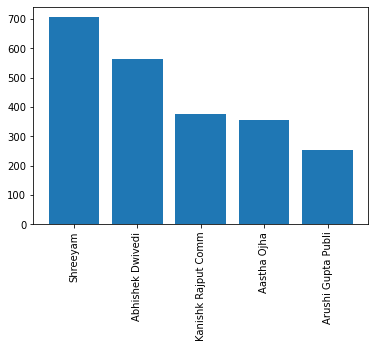

In [54]:
import matplotlib.pyplot as plt
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [147]:
hf=round((df['user'].value_counts()/df['user'].value_counts().sum())*100,2).reset_index().rename(columns={'index':'name','user':'percent'})

In [149]:
hf

,name,percent
0,Shreeyam,13.85
1,Abhishek Dwivedi,11.03
2,Kanishk Rajput Comm,7.36
3,Aastha Ojha,6.99
4,Arushi Gupta Publi,4.95
5,Chetan Mun Cera,4.59
6,~Tilak -1 mech,4.43
7,Ron Rexy | WMC,4.40
8,Satwik Trivedi Mun,4.38
9,Pulkit Soni SHARE| E-CELL,3.30


In [19]:
df = df[df['user'] != 'group notification']

In [24]:
df=df[df['message']!='<Media omitted>\n']

In [25]:
df

,user,message,year,month,day,hour,min
36,Shreeyam,Congratulations to everyone and a warm welcome...,2023,June,15,15,59
37,Mayank Tomar comm '22,Mayank Tomar\nCivil \nCommittee affairs.\n,2023,June,15,16,0
38,Shivansh Gupta -1,SHIVANSH GUPTA\nEEE\nLogistic & Hospitality\n,2023,June,15,16,1
39,Aakruti Kalia '22,Hey everyone!\nI'm Aakruti Kalia from Mechanic...,2023,June,15,16,2
40,~Tilak -1 mech,"Hey Guys, Tilak this side! I have been selecte...",2023,June,15,16,4
...,...,...,...,...,...,...,...
5090,Satwik Trivedi Mun,Opportunity for girls\n,2024,February,21,18,28
5091,Shreeyam,,2024,February,29,19,35
5092,Shreeyam,Jo log vote nhi kr paa rhe vo party bhi chill ...,2024,February,29,21,6
5093,Mayank Tomar comm '22,@917838888445 why out ?\nYou are part of the b...,2024,February,29,21,8
